## 🔬 FDA Food Safety Enforcement Audit (2008-2022)
**Author:** Md Shafin Ahamed  
**Domain:** Food Technology | Food Safety Risk Assessment  
**Tools:** Python, Pandas, Seaborn, NLP  

---

### 📋 Executive Summary  
This project performs a programmatic audit of FDA Food Enforcement records. Unlike manual review methods, this analysis utilizes **Natural Language Processing (NLP)** to categorize unstructured recall data and identify systemic failures in the supply chain.

**Key Objectives:**  
1.  **Categorize** arund 6,500 unique recall reasons into standardized risk groups.  
2.  **Analyze** temporal trends to visualize the impact of global events (e.g., COVID-19).  
3.  **Locate** geographic hotspots for food safety violations.  

In [12]:
#step 1: Importing Tools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Inserting the FILE into the code
file_path = r"D:\DataFiles\FDA Food Data\data\food_enforcement.csv"
#Reading File, type=CSV and Encoding ='ISO-8859-1'
df= pd.read_csv(file_path, encoding='ISO-8859-1')

### 1. The "What": Identifying Critical Risk Factors (NLP)  
**Challenge:** The raw FDA data contains around 6,500 unique, unstructured text descriptions for recalls (e.g., "found listeria in tub," "listeria detected").  
**Solution:** I developed a keyword-based categorization algorithm to group these into standardized risk classes (e.g., **"Listeria"**, **"Undeclared Allergen"**).  

**Hypothesis:** While biological pathogens are dangerous, labeling errors (Allergens) may be more frequent due to documentation failures.

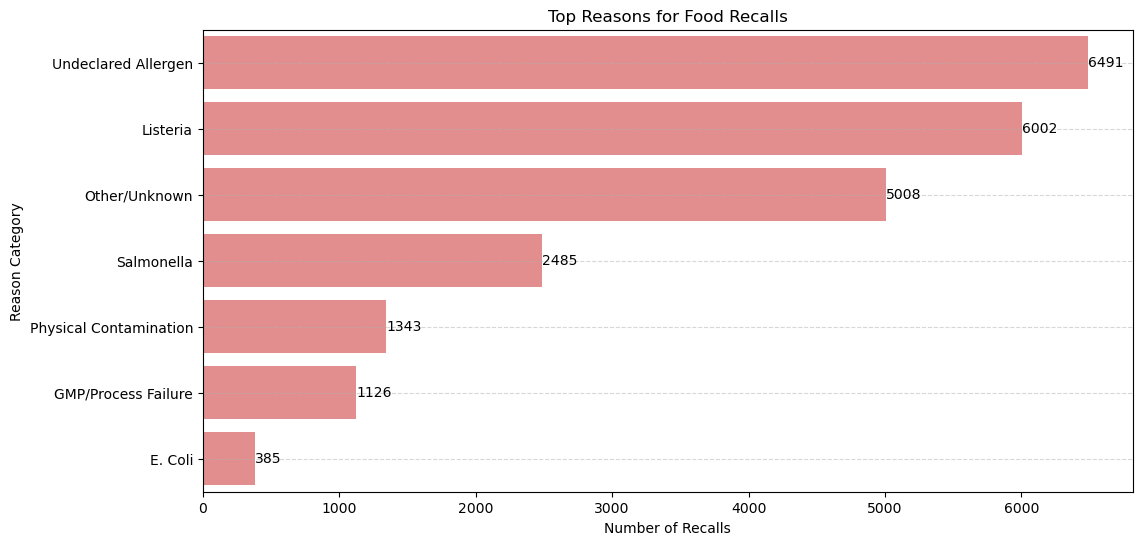

In [63]:
#step 2: Data cleaning & NPL
def categorize_reason(text):
    text = str(text).lower()
    
    # The Logic Rules (The "Sensors")
    if 'listeria' in text:
        return 'Listeria'
    elif 'salmonella' in text:
        return 'Salmonella'
    elif 'e. coli' in text:
        return 'E. Coli'
    # Grouping all allergy issues together
    elif 'undeclared' in text or 'allergen' in text or 'milk' in text or 'peanut' in text or 'soy' in text:
        return 'Undeclared Allergen'
    # Grouping manufacturing failures
    elif 'gmp' in text or 'manufacturing' in text or 'process' in text:
        return 'GMP/Process Failure'
    # Grouping physical hazards
    elif 'plastic' in text or 'glass' in text or 'metal' in text:
        return 'Physical Contamination'
    else:
        return 'Other/Unknown'

# Create a NEW column called 'short_reason'
df['short_reason'] = df['reason_for_recall'].apply(categorize_reason)

#step 3 : Visualization
#Give a size 
plt.figure(figsize=(12,6))
#countplot for automatic plot
ax= sns.countplot( data= df,
              y= 'short_reason',
              order= df['short_reason'].value_counts().index, color='#F08080')
# Loop through the bars and add the numbers
for container in ax.containers:
    ax.bar_label(container, )

#the frame work
plt.title('Top Reasons for Food Recalls')
plt.xlabel('Number of Recalls')
plt.ylabel('Reason Category')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig("fda_recall_graph.png") #to save the graph as PNG
#display
plt.show()

### 2. The "When": Temporal Trend Analysis  
**Objective:** To determine if food safety incidents are increasing or decreasing over the last decade.  
**Methodology:**  
* Converted `recall_initiation_date` to DateTime objects.  
* Filtered for the 2012-2022 period to ensure data consistency.  
* Annotated the **2020 COVID-19** onset to observe regulatory impacts (e.g., reduced onsite inspections).  

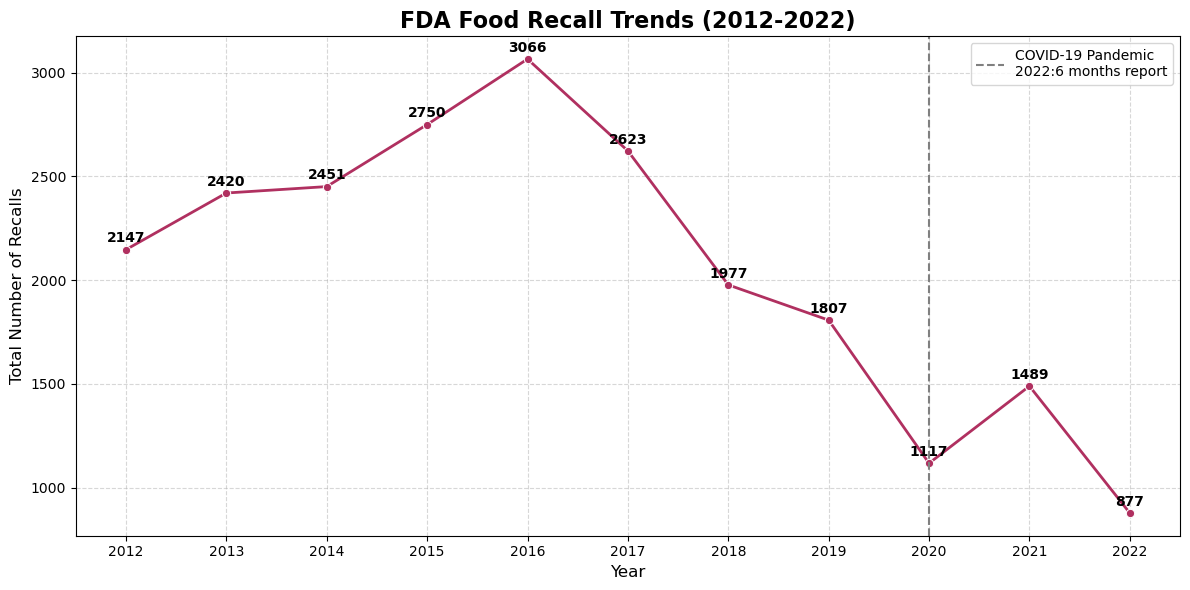

In [36]:
#Time trend 

#1.Converting date column into time
df['recall_initiation_date'] = pd.to_datetime(
    df['recall_initiation_date'], errors='coerce')

#2.creating a new column, Year
df['year'] = df['recall_initiation_date'].dt.year

#3.Filter for Reliable Data (2012-2022)
df_trend = df[(df['year']>=2012 )& (df['year']<= 2022)]

#4.Count Recalls per Year
yearly_counts = df_trend['year'].value_counts().sort_index()

#5.Visualization
plt.figure(figsize=(12, 6))

#'marker=o' puts a dot on each year so you can see the data point clearly
ax = sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o', linewidth=2, color='#b03060') 

#X: ADDING NUMBERS TO DOTS ---
# We loop through every Year (x) and Count (y) pair
for x, y in zip(yearly_counts.index, yearly_counts.values):
    # y + 20 pushes the text up slightly so it doesn't cover the dot
    ax.text(x, y + 20, f'{y}', ha='center', va='bottom', fontsize=10, weight='bold')

#the start of COVID-19 
plt.axvline(x=2020, color='gray', linestyle='--', label='COVID-19 Pandemic''\n2022:6 months report')

# Professional Labels
plt.title('FDA Food Recall Trends (2012-2022)', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Number of Recalls', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(yearly_counts.index)

#Save and Show
plt.tight_layout()
plt.savefig('recall_trend_line.png')
plt.show()

### 3. The "Where": Geographic Supply Chain Hotspots  
**Objective:** To identify which regions contribute most significantly to recall events.  
**Insight:** This analysis highlights key manufacturing hubs (e.g., California) and reveals cross-border enforcement involving Canadian provinces (Ontario, Quebec).

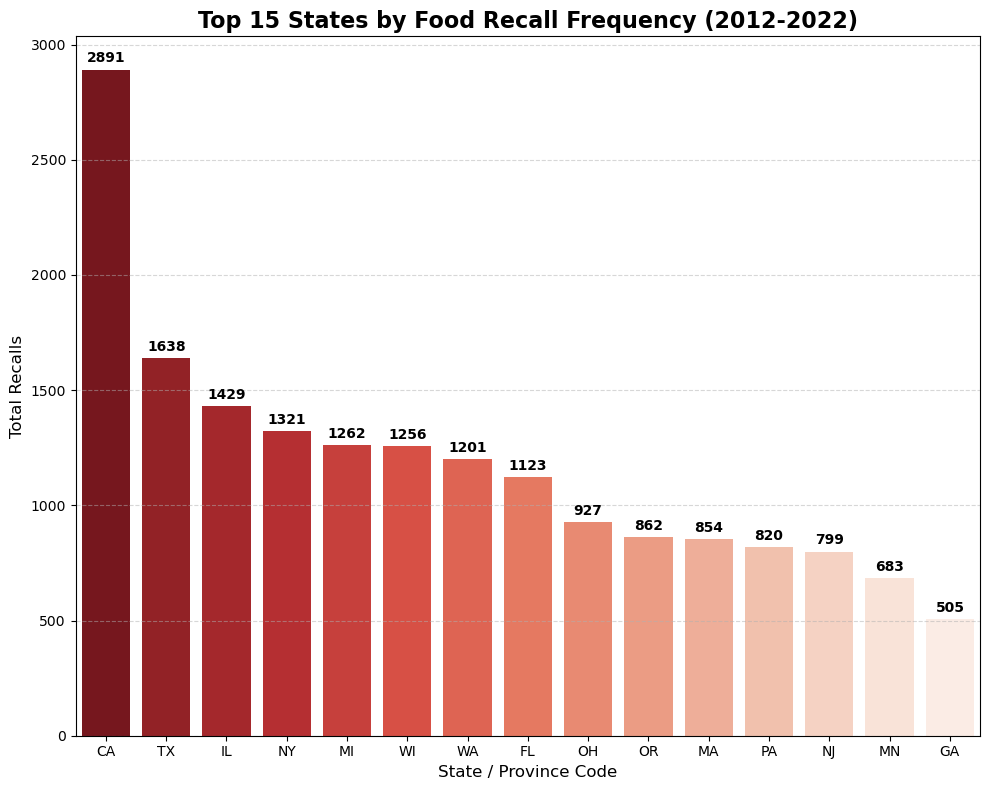

In [67]:
#GEOGRAPHIC ANALYSIS: Top 15 Locations
#1.cleaing data
df_geo = df.dropna(subset=['state'])
#2.Count Recalls per State
state_count = df_geo['state'].value_counts().head(15)
#3.Plot the chart
plt.figure(figsize=(10,8)) #size
#chart
ax= sns.barplot(
    x= state_count.index ,
    y= state_count.values,
    hue= state_count.index,
    legend=False ,
    palette= "Reds_r"
)
#adding number 
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize= 10, weight='bold')
#format
plt.title('Top 15 States by Food Recall Frequency (2012-2022)', fontsize=16, weight='bold')
plt.xlabel('State / Province Code', fontsize=12)
plt.ylabel('Total Recalls', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
# Save
plt.tight_layout()
plt.savefig('geo_analysis_states.png')
plt.show()